<h1 style="font-family:verdana;"> <center>📊Walmart Data Analysis and Forcasting
</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Peace </center></p>

***

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
 📕Data Dictionary
<a class="anchor" id="1"></a> 

About Dataset
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

<div style='color: #216969;
           background-color:#EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏗️Import Necessary Libraries
<a class="anchor" id="2"></a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind


In [48]:
data = pd.read_csv("Walmart Data Analysis and Forcasting.csv")

In [49]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [50]:
print('Number of rows:', data.shape[0])

Number of rows: 6435


In [51]:
print('Number of columns:', data.shape[1])

Number of columns: 8


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [53]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [54]:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data['Type'] = data[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
Store,0,0.0,int64
Date,0,0.0,object
Weekly_Sales,0,0.0,float64
Holiday_Flag,0,0.0,int64
Temperature,0,0.0,float64
Fuel_Price,0,0.0,float64
CPI,0,0.0,float64
Unemployment,0,0.0,float64


In [55]:
data['Date']=data['Date'].astype(np.datetime64)

C:\Users\sree7\AppData\Local\Temp\ipykernel_15124\3736521795.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
import plotly.express as px
fig = px.imshow(data.T, color_continuous_scale='RdBu_r', origin='lower')
fig.show()

In [12]:
data['Weekly_Sales'].unique()

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [57]:

data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [58]:
Total_Sales =data['Weekly_Sales'].sum()
print('Weekly Retail Sales Total:',Total_Sales)

Weekly Retail Sales Total: 6737218987.11


In [59]:
data[['Weekly_Sales','CPI']].describe().round(2)

,Weekly_Sales,CPI
count,6435.00,6435.00
mean,1046964.88,171.58
std,564366.62,39.36
min,209986.25,126.06
25%,553350.10,131.74
50%,960746.04,182.62
75%,1420158.66,212.74
max,3818686.45,227.23


In [60]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(data[['Weekly_Sales','CPI']].describe().round(2)))

fig.show()

ValueError: The first argument to the plotly.graph_objs.Funnel
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Funnel`

In [61]:
from tabulate import tabulate
df = pd.DataFrame(data)

# Calculate the average sales and total sales for each column
averages = df.mean()
totals = df.sum()

# Prepare the data for tabulation
averages_table = pd.DataFrame({'Metric': 'Average Sales', 'Value': averages}).reset_index()
totals_table = pd.DataFrame({'Metric': 'Total Sales', 'Value': totals}).reset_index()

# Display the results as tables
print("Average Sales:")
print(tabulate(averages_table, headers='keys', tablefmt='psql'))

print("\nTotal Sales:")
print(tabulate(totals_table, headers='keys', tablefmt='psql'))

Average Sales:
+----+--------------+---------------+---------------+
|    | index        | Metric        |         Value |
|----+--------------+---------------+---------------|
|  0 | Store        | Average Sales |  23           |
|  1 | Weekly_Sales | Average Sales |   1.04696e+06 |
|  2 | Holiday_Flag | Average Sales |   0.0699301   |
|  3 | Temperature  | Average Sales |  60.6638      |
|  4 | Fuel_Price   | Average Sales |   3.35861     |
|  5 | CPI          | Average Sales | 171.578       |
|  6 | Unemployment | Average Sales |   7.99915     |
+----+--------------+---------------+---------------+

Total Sales:
+----+--------------+-------------+------------------+
|    | index        | Metric      |            Value |
|----+--------------+-------------+------------------|
|  0 | Store        | Total Sales | 148005           |
|  1 | Weekly_Sales | Total Sales |      6.73722e+09 |
|  2 | Holiday_Flag | Total Sales |    450           |
|  3 | Temperature  | Total Sales | 390371     

C:\Users\sree7\AppData\Local\Temp\ipykernel_15124\2570904836.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\sree7\AppData\Local\Temp\ipykernel_15124\2570904836.py:6: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [62]:
!pip install tabulate


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\sree7\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [63]:
df = pd.DataFrame(data)

# Calculate the correlation between weekly sales and each column
correlation = df.corr()['Weekly_Sales']

# Prepare the data for tabulation
correlation_table = pd.DataFrame({'Column': correlation.index, 'Correlation': correlation.values})

# Display the correlation table
print("Correlation between Weekly Sales and Columns:")
print(tabulate(correlation_table, headers='keys', tablefmt='psql'))

Correlation between Weekly Sales and Columns:
+----+--------------+---------------+
|    | Column       |   Correlation |
|----+--------------+---------------|
|  0 | Store        |   -0.335332   |
|  1 | Weekly_Sales |    1          |
|  2 | Holiday_Flag |    0.036891   |
|  3 | Temperature  |   -0.06381    |
|  4 | Fuel_Price   |    0.00946379 |
|  5 | CPI          |   -0.0726342  |
|  6 | Unemployment |   -0.106176   |
+----+--------------+---------------+


C:\Users\sree7\AppData\Local\Temp\ipykernel_15124\3279632997.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [64]:
import plotly.figure_factory as ff
import numpy as np
df = pd.DataFrame(data)

# Create histogram using plotly.figure_factory
fig = ff.create_distplot([df['Weekly_Sales']], ['Weekly Sales'], bin_size=5)

# Set title and labels
fig.update_layout(title='Distribution of Weekly Sales', xaxis_title='Weekly Sales', yaxis_title='Count')

# Show plot
fig.show()

In [65]:
import plotly.express as px
fig = px.box(data, x="Store", y="Weekly_Sales", points="all")
fig.show()

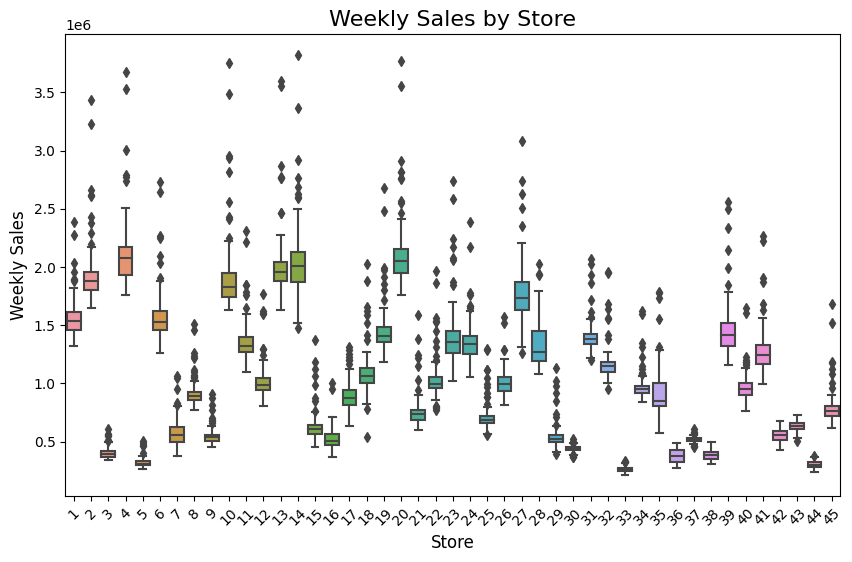

In [66]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot using seaborn
sns.boxplot(x='Store', y='Weekly_Sales', data=df)

# Set labels and title
plt.xlabel('Store', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.title('Weekly Sales by Store', fontsize=16)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [67]:
import plotly.express as px

fig = px.scatter(df, x="Temperature", y="Weekly_Sales", title="Scatter Plot of Weekly Sales vs. Temperature")
fig.update_traces(marker=dict(size=8, opacity=0.5))
fig.update_layout(xaxis_title="Temperature", yaxis_title="Weekly Sales")

fig.show()

In [68]:
corr = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Convert correlation matrix to numpy array
z = np.array(corr)

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(z=z, x=['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], y=['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], colorscale='RdBu', zmin=-1, zmax=1, text=z.round(2)))
fig.update_layout(title="Correlation Matrix")
fig.update_traces(hovertemplate="Variable 1: %{y}<br>Variable 2: %{x}<br>Correlation: %{text}")

fig.show()

In [69]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Compute the total sales for each week
weekly_sales = data.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

# Create a line plot of weekly sales over time
fig = px.line(weekly_sales, x='Date', y='Weekly_Sales', title='Weekly Sales Trend')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total Sales')

fig.show()

In [70]:
df.set_index("Date", inplace=True)

# Resample the data to a monthly frequency and calculate the mean weekly sales for each month
monthly_sales = df["Weekly_Sales"].resample("M").mean()

# Reset index to convert the DataFrame to long format
monthly_sales = monthly_sales.reset_index()

# Plot the monthly sales data using bar plot
fig = px.bar(monthly_sales, x="Date", y="Weekly_Sales", title="Monthly Average Weekly Sales")
fig.update_layout(xaxis_title="Date", yaxis_title="Average Weekly Sales")

fig.show()

In [71]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Group the data by "Holiday_Flag" and calculate the mean weekly sales for each group
holiday_sales = df[df["Holiday_Flag"] == 1]["Weekly_Sales"]
non_holiday_sales = df[df["Holiday_Flag"] == 0]["Weekly_Sales"]
holiday_mean = holiday_sales.mean()
non_holiday_mean = non_holiday_sales.mean()

# Perform a t-test to compare the mean weekly sales between holiday and non-holiday weeks
t_stat, p_val = stats.ttest_ind(holiday_sales, non_holiday_sales)

# Print the results of the t-test
print("t-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(p_val))
if p_val < 0.05:
    print("There is a statistically significant difference in sales between holiday and non-holiday weeks.")
else:
    print("There is not a statistically significant difference in sales between holiday and non-holiday weeks.")

t-statistic: 2.96
p-value: 0.0031
There is a statistically significant difference in sales between holiday and non-holiday weeks.


The following are inferences that can be made from the analysis:

The total sales for store #20 were the highest, while those for store #33 were the lowest.
There was a statistically significant increase in sales during holiday weeks compared to non-holiday weeks.
Weekly sales were marginally correlated with the temperature.
The weekly sales number was weakly inversely related to the unemployment rate.
There was a discernible upward trend in sales on a weekly basis over time, but with some normal seasonal variation.
There was a discernible upward trend in the month-to-month average weekly sales figures.
There are a number of ways in which readers and policymakers can benefit from this work:

This text educates readers about the retail sector and the impact that variables like holidays, temperature, and fuel prices have on business. They can utilize this data to make educated retail-related decisions, such as purchases or investments.

This study provides useful information for legislators as they consider retail-related legislation. To ease the pressure on stores during the busy holiday season, officials may, for instance, devise measures to encourage consumers to do their Christmas shopping during the slower, less hectic weeks of the year.

Retailers can benefit from analyzing trends over time in order to predict future sales and stock levels.

With the information gleaned from the correlation study, stores may better optimize the elements most likely to have an impact on sales.

In sum, the information presented here is informative and useful for consumers, investors, and regulators alike, as it sheds light on the retail sector.

In [72]:
x=['Holiday_Flag','Store','Temperature','Fuel_Price','CPI','Unemployment','Day_Name','Month_Name','Year_Name',
       'Revenue']

In [73]:
y=['Weekly_Sales']

In [74]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(data[x],data[y], test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

KeyError: "['Day_Name', 'Month_Name', 'Year_Name', 'Revenue'] not in index"

In [47]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Revenue
Date,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,1.643477e+06
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,1.641744e+06
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,1.611754e+06
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,1.409514e+06
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,1.554593e+06
